<a href="https://colab.research.google.com/github/zainaae/CODSOFT/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import necessary libraries and read the Iris dataset.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Read the Iris dataset from a CSV file
df = pd.read_csv("/content/IRIS.csv", sep=",", encoding='utf-8')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Step 2: Data Preprocessing

In [16]:
# Data preprocessing - Round numerical columns
df["sepal_length"] = df["sepal_length"].round(3)
df["sepal_width"] = df["sepal_width"].round(3)
df["petal_length"] = df["petal_length"].round(3)
df["petal_width"] = df["petal_width"].round(3)


Step 3: Data Analysis and Visualization

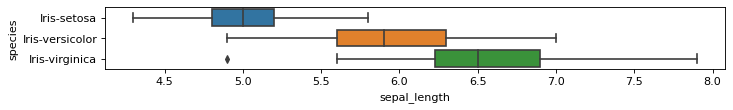

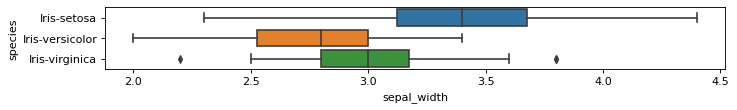

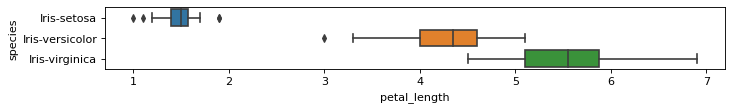

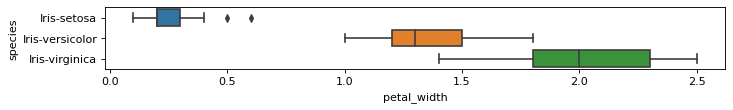

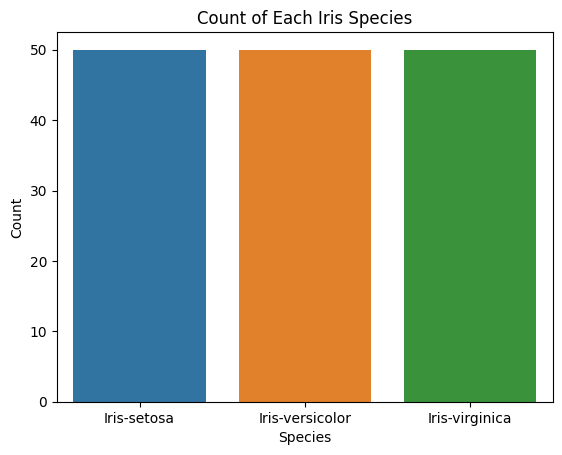

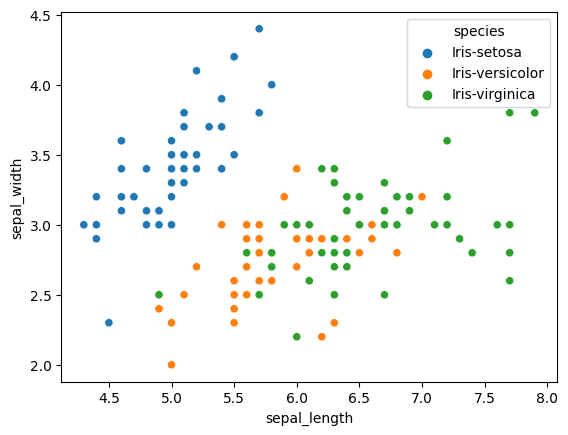

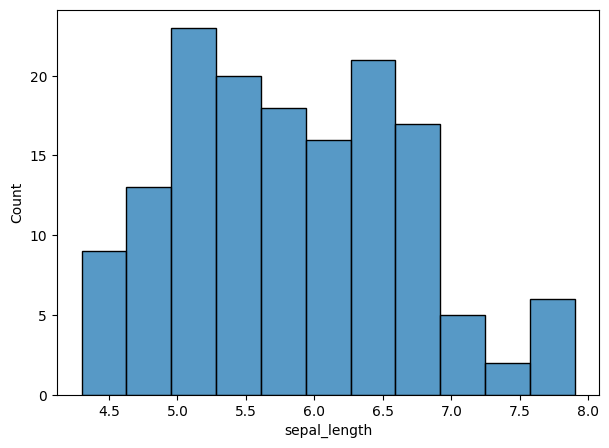

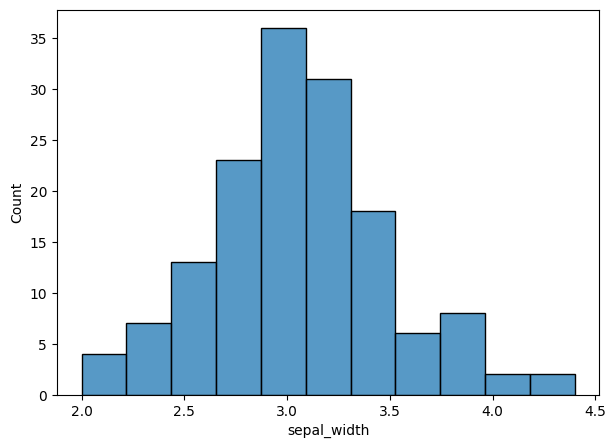

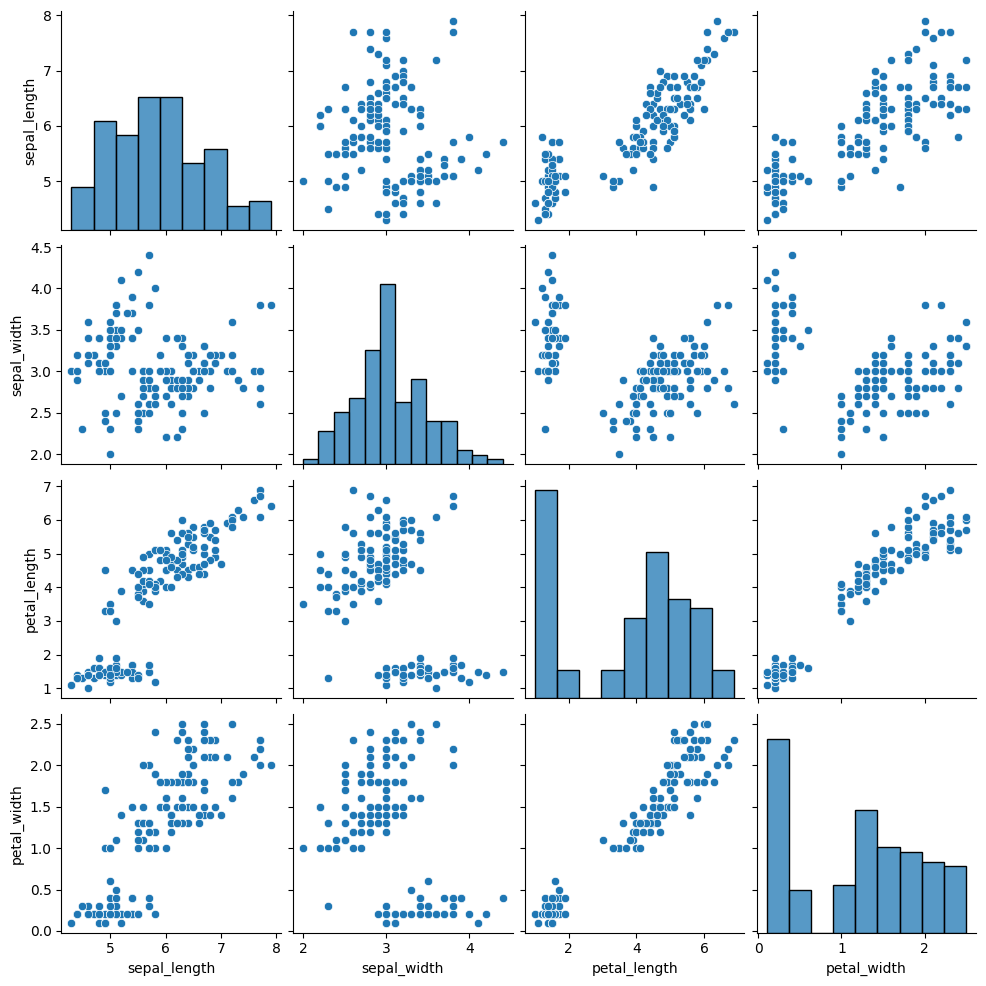

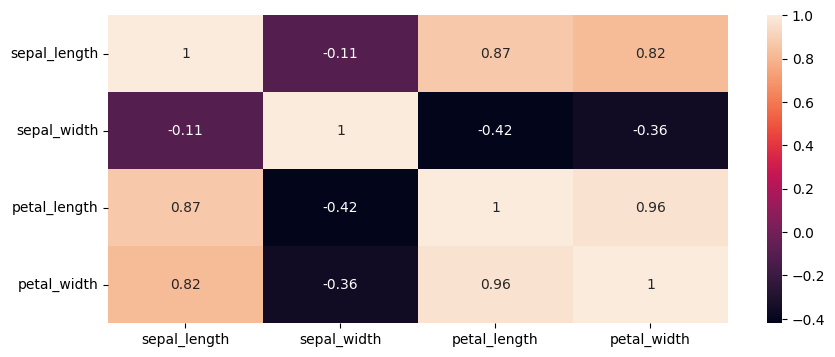

In [8]:
# Data analysis and visualization
# Boxplots for numerical features

numerical_data = []
object_data = []

for column in df.columns:
    if df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

for i in range(0, len(numerical_data)):
    plt.figure(figsize=(10, 1), dpi=80)
    sns.boxplot(x=df[numerical_data[i]], y=df['species'], data=df, orient="h")
    plt.show()

# Count the occurrences of each species
species_count = df['species'].value_counts()

# Create a bar plot of the species count
sns.barplot(x=species_count.index, y=species_count.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Each Iris Species')
plt.show()

# Scatter plot for sepal length and sepal width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

# Histograms for sepal length and sepal width
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='sepal_length', bins=11)

plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='sepal_width', bins=11)

# Pairplot to visualize relationships
sns.pairplot(df)

# Correlation heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True)
plt.show()


Step 4: Random Forest Classifier

In [18]:
# Data preprocessing for RandomForestClassifier
# Define features (X) and target variable (y)
X = df.drop(['species', "sepal_width"], axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions using Random Forest
y_pred_rf = RF.predict(X_test)

# Generate a classification report for Random Forest
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest Classifier:")
print(report)



Classification Report for Random Forest Classifier:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



 Step 5: Using the load_iris Dataset and K-Nearest Neighbors (KNN)

In [21]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbors (KNN) classifier
k = 3  # Number of neighbors to consider
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data using KNN
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy for KNN
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier Accuracy: {:.2f}%".format(accuracy * 100))

# Generate a classification report for KNN
class_names = iris.target_names
print("\nClassification Report for KNN Classifier:")
print(classification_report(y_test, y_pred, target_names=class_names))


KNN Classifier Accuracy: 100.00%

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

